In [218]:
import pandas as pd
# import numpy as np
from matplotlib import pyplot as plt
# import math

In [219]:
df = pd.read_csv('../data/ObesityDataSet_raw_and_data_sinthetic.csv')

In [221]:
df.head(10)

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,29.0,Male,1.62,53.0,Sometimes,yes,2.0,3.0,no,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
6,23.0,Female,1.50,55.0,Sometimes,yes,3.0,3.0,no,no,2.0,yes,1.0,0.0,Sometimes,Motorbike,Normal_Weight
7,22.0,Male,1.64,53.0,Sometimes,no,2.0,3.0,no,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
8,24.0,Male,1.78,64.0,Frequently,yes,3.0,3.0,no,no,2.0,yes,1.0,1.0,Sometimes,Public_Transportation,Normal_Weight
9,22.0,Male,1.72,68.0,no,yes,2.0,3.0,no,no,2.0,yes,1.0,1.0,Sometimes,Public_Transportation,Normal_Weight


CALC : Feature, Categorical, " How often do you drink alcohol? "

FAVC : Feature, Binary, " Do you eat high caloric food frequently? "

FCVC : Feature, Integer, " Do you usually eat vegetables in your meals? " 

    Possible Integer Values:

    0: No, I don't eat vegetables in my meals.

    1: Yes, but only occasionally.

    2: Yes, frequently.
    
    3: Yes, in almost every meal.

NCP : Feature, Continuous, " How many main meals do you have daily? "

SCC: Feature, Binary, " Do you monitor the calories you eat daily? "

SMOKE : Feature, Binary, " Do you smoke? "

CH2O: Feature, Continuous, " How much water do you drink daily? "

family_history_with_overweight: Feature, Binary, " Has a family member suffered or suffers from overweight? "

FAF: Feature, Continuous, " How often do you have physical activity? "

TUE : Feature, Integer, " How much time do you use technological devices such as cell phone, videogames, television, computer and others? "

CAEC : Feature, Categorical, " Do you eat any food between meals? "

MTRANS : Feature, Categorical, " Which transportation do you usually use? "

NObeyesdad : Target, Categorical, "Obesity level"

clean data

In [222]:
def BMIcheck(bmi):
    if bmi<18.5:
        return "Insufficient_Weight"
    elif 18.5<=bmi<=24.9:
        return "Normal_Weight"
    elif 25<=bmi<=27.45:
        return "Overweight_Level_I"
    elif 27.45<=bmi<=29.9:
        return "Overweight_Level_II"
    elif 30<=bmi<=34.9:
        return "Obesity_Type_I"
    elif 35<=bmi<=39.9:
        return "Obesity_Type_II"
    else:
        return "Obesity_Type_III"

In [224]:
df_clean  = df.copy()
df_clean["BMI"] = df_clean["Weight"]/(df_clean["Height"]**2)
df["BMI"] = df["Weight"]/(df["Height"]**2)
# df_clean["Age"] = df_clean["Age"].apply(math.floor)
# df_clean["FCVC"] = df_clean["FCVC"].apply(math.floor)
# df_clean["NCP"] = df_clean["NCP"].apply(math.floor)
df_clean["Height"] = df_clean["Height"].apply(lambda x: round(x, 2))
df_clean["Weight"] = df_clean["Weight"].apply(lambda x: round(x, 2))
# df_clean["CH2O"] = df_clean["CH2O"].apply(math.floor)
# df_clean["FAF"] = df_clean["FAF"].apply(math.floor)
# df_clean["TUE"] = df_clean["TUE"].apply(math.floor)
df_clean["BMI"] = df_clean["BMI"].apply(lambda x: round(x, 2))
df_clean.groupby("NObeyesdad").BMI.describe()
# df.groupby("NObeyesdad").BMI.describe()
new = df[df.NObeyesdad == "Insufficient_Weight"]
new[new.BMI == new.BMI.max()]
# df_clean
# df.groupby("NObeyesdad").count()
df_clean["NObeyesdad"] = df_clean["BMI"].apply(BMIcheck)
df_clean.groupby("NObeyesdad").BMI.describe()
df[df["NObeyesdad"]!=df_clean["NObeyesdad"]].count()

Age                               165
Gender                            165
Height                            165
Weight                            165
CALC                              165
FAVC                              165
FCVC                              165
NCP                               165
SCC                               165
SMOKE                             165
CH2O                              165
family_history_with_overweight    165
FAF                               165
TUE                               165
CAEC                              165
MTRANS                            165
NObeyesdad                        165
BMI                               165
dtype: int64

In [225]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,BMI
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866,29.700159
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927,8.011337
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000,12.998685
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000,24.325802
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350,28.719089
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000,36.016501
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000,50.811753


<BarContainer object of 1402 artists>

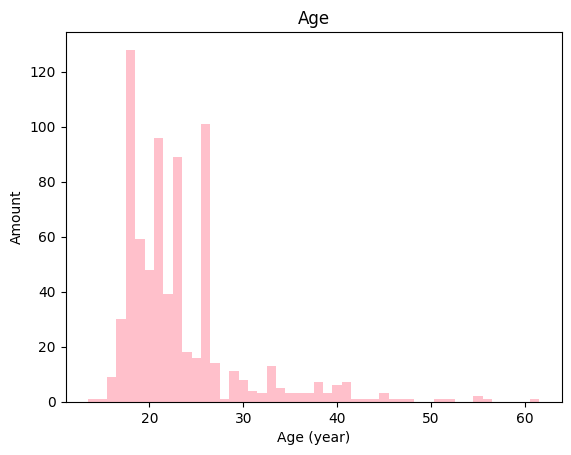

In [226]:
age = df.Age.value_counts().sort_index().index
age_count = df.Age.value_counts().sort_index().values
plt.title("Age")
plt.xlabel('Age (year)')
plt.ylabel('Amount')
plt.bar(age, age_count, width=1, color="pink")